In [26]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
def confusion_matrix_plot(confusion_matrix, labels, title="Confusion matrix"):
    sn.set(font_scale = 6)
    df = pd.DataFrame(confusion_matrix, index = [x for x in labels], columns = [x for x in labels])
    df = df.rename_axis("True label", axis = "rows")
    df = df.rename_axis("Predicted label", axis = "columns")
    plt.figure(figsize = (20, 17))
    sn.heatmap(df, annot = True, cmap = "Blues", square = True, fmt = "d")
    plt.title(title)
    plt.yticks(rotation = 0)
    plt.savefig(title + ".png")
    plt.show()

In [5]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv')
df = df.drop('Unnamed: 0', axis=1)
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
df['y'] = df['y'].map(dic)
df = shuffle(df)

In [6]:
print(df[df['y'] == 1].describe().iloc[:, :-1].mean().mean())
print(df[df['y'] == 1].describe().iloc[:, :-1].std().std())

290.1399191665182
44.32057048272225


In [7]:
print(df[df['y'] != 1].describe().iloc[:, :-1].mean().mean())
print(df[df['y'] != 1].describe().iloc[:, :-1].std().std())

1260.7174605618443
15.5691214372535


In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('y', axis=1))
y = np.array(df['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=17)

In [9]:
clustering = DBSCAN(eps=8, min_samples=20).fit(X)
np.unique(clustering.labels_)

array([-1,  0], dtype=int64)

In [43]:
v = clustering.labels_
v = [abs(x) for x in v]
cm = confusion_matrix(y, v)#, normalize='true')
cm

array([[9055,  145],
       [ 269, 2031]], dtype=int64)

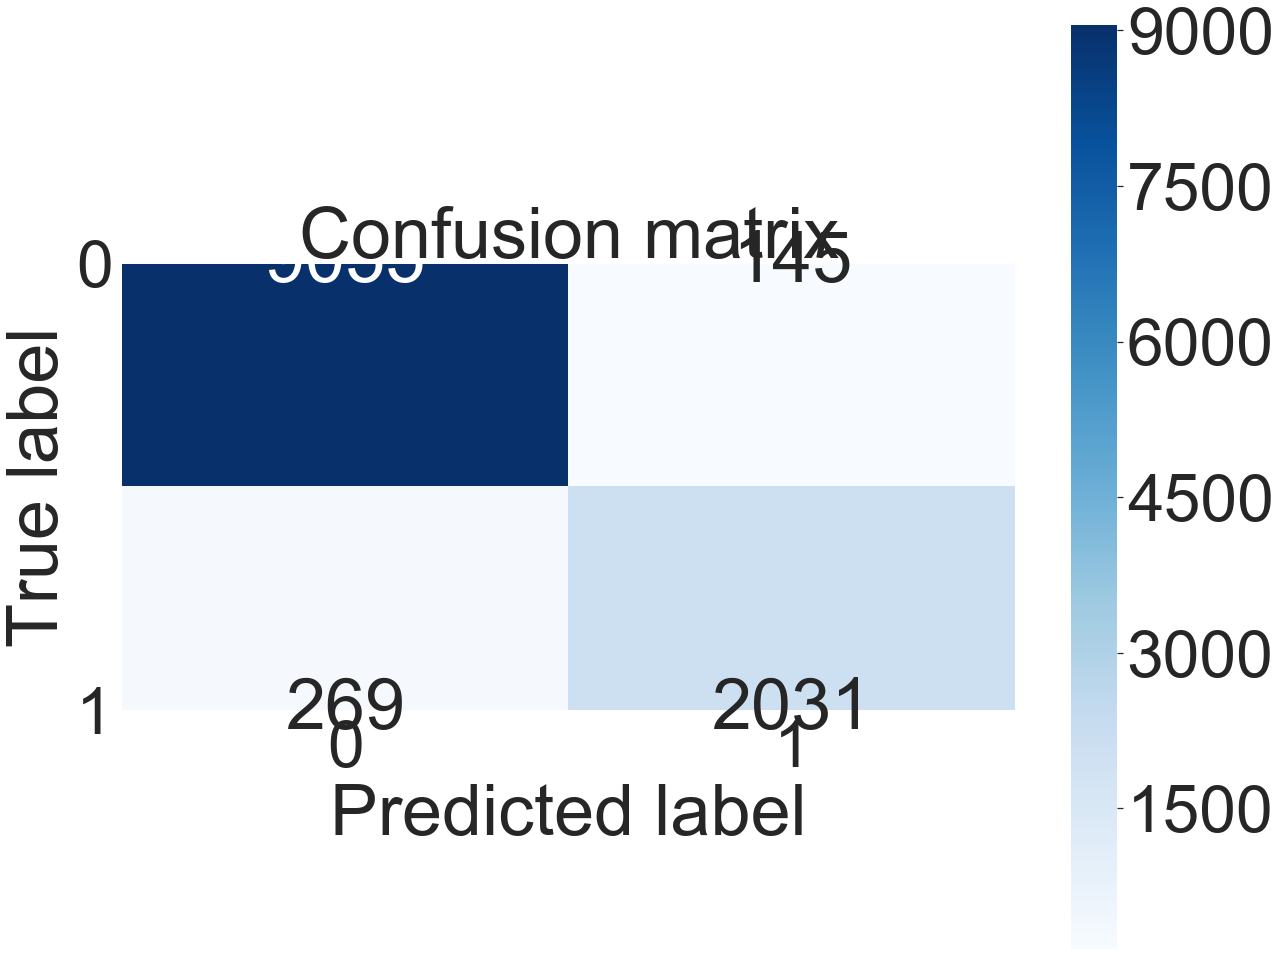

In [46]:
confusion_matrix_plot(cm, ['0', '1'])


In [11]:
print(f'{round((y == v).sum() / len(y) * 100, 2)}%')

96.4%


In [0]:
pairwise_distances([X[1]], [X[8]], metric="euclidean")

array([[6745.83352893]])

In [0]:
print(y[:20])

[0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [170]:
gmm = GaussianMixture(2, covariance_type='full', max_iter=200, tol=1e-3)
gmm.fit(X_train)
print((gmm.predict(X_val) != y_val).sum()/len(y_val))

0.8885869565217391


In [146]:
print((gmm.predict(X_test) == y_test).sum()/len(y_test))

0.49


In [171]:
gmm = GaussianMixture(2, covariance_type='spherical', max_iter=200, tol=1e-40)
gmm.fit(X_train)
print((gmm.predict(X_val) != y_val).sum()/len(y_val))

0.9581521739130435


In [172]:
print((gmm.predict(X_test) != y_test).sum()/len(y_test))

0.9660869565217391
